In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing The Required Libraries

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# df1 = pd.read_csv('/kaggle/input/iris/Iris.csv')
adult = fetch_ucirepo(id=2)
adult_df = adult.data.original

In [11]:
adult_df.income.replace(["<=50K", "<=50K."], 0, inplace = True)
adult_df.income.replace([">50K", ">50K."], 1, inplace = True)

In [12]:
adult_df.replace('?', np.nan, inplace=True)
adult_pred = adult_df.dropna()

In [13]:
adult_data = adult_pred.drop(columns=['income'])
adult_label = adult_pred.income

In [14]:
adult_cat_1hot = pd.get_dummies(adult_data.select_dtypes('object'))
adult_non_cat = adult_data.select_dtypes(exclude='object')

adult_data_1hot = pd.concat([adult_non_cat, adult_cat_1hot, adult_label], axis=1, join='inner')
adult_data_1hot = adult_data_1hot.replace(False, 0)
adult_data_1hot = adult_data_1hot.replace(True, 1)

# Creating A Function To Get The Details of The Dataset

In [8]:
def get_info_dataframe(dataframe):
    print(f"DATAFRAME GENERAL INFO - \n")
    print(dataframe.info(),"\n")
    print(f"DATAFRAME MISSING INFO - \n")
    print(dataframe.isnull().sum(),"\n")
    print(f"DATAFRAME SHAPE INFO - \n")
    print(dataframe.shape)

In [15]:
get_info_dataframe(adult_data_1hot)

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Columns: 105 entries, age to income
dtypes: int64(105)
memory usage: 37.6 MB
None 

DATAFRAME MISSING INFO - 

age                               0
fnlwgt                            0
education-num                     0
capital-gain                      0
capital-loss                      0
                                 ..
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
income                            0
Length: 105, dtype: int64 

DATAFRAME SHAPE INFO - 

(45222, 105)


In [16]:
adult_data_1hot['income'].unique()

array([0, 1], dtype=int64)

In [17]:
df1 = adult_data_1hot

# LabelEncoding The Attributes of The Target Column

In [18]:
# df1['Species'] = df1['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [19]:
df1.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# df1.drop(['Id'],axis=1,inplace=True)

In [21]:
df1.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X = df1.drop(["income"],axis=1).values
y = df1["income"].values

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
scaler = StandardScaler()

# Doing The Train Test Split And Scaling The Data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converting From Numpy Array To Torch Tensor

In [28]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Creating Our Neural Network Model For Classification

In [29]:
class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,128)
        self.hidden_layer1  = nn.Linear(128,64)
        self.output_layer   = nn.Linear(64,output_dim)
        self.relu = nn.ReLU()
    
    
    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

In [35]:
# input_dim = 4 because we have 4 inputs namely sepal_length,sepal_width,petal_length,petal_width
# output_dim = 3 because we have namely 3 categories setosa,versicolor and virginica
input_dim  = 104 
output_dim = 2
model = NeuralNetworkClassificationModel(input_dim,output_dim)

In [36]:
# creating our optimizer and loss function object
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [37]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)
        


        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [38]:
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [39]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/1000, Train Loss: 0.2984, Test Loss: 0.3241
Epoch 100/1000, Train Loss: 0.2480, Test Loss: 0.3835
Epoch 150/1000, Train Loss: 0.2344, Test Loss: 0.4799
Epoch 200/1000, Train Loss: 0.2057, Test Loss: 0.5367
Epoch 250/1000, Train Loss: 0.1965, Test Loss: 0.5693
Epoch 300/1000, Train Loss: 0.1900, Test Loss: 0.6669
Epoch 350/1000, Train Loss: 0.1879, Test Loss: 0.6979
Epoch 400/1000, Train Loss: 0.1748, Test Loss: 0.7170
Epoch 450/1000, Train Loss: 0.1791, Test Loss: 0.7941
Epoch 500/1000, Train Loss: 0.1718, Test Loss: 0.8363
Epoch 550/1000, Train Loss: 0.1785, Test Loss: 0.8922
Epoch 600/1000, Train Loss: 0.1670, Test Loss: 0.8924
Epoch 650/1000, Train Loss: 0.1430, Test Loss: 0.9537
Epoch 700/1000, Train Loss: 0.1605, Test Loss: 0.8861
Epoch 750/1000, Train Loss: 0.1383, Test Loss: 0.9718
Epoch 800/1000, Train Loss: 0.1656, Test Loss: 1.1129
Epoch 850/1000, Train Loss: 0.1354, Test Loss: 1.0312
Epoch 900/1000, Train Loss: 0.1325, Test Loss: 1.1219
Epoch 950/1000, Train Loss: 0

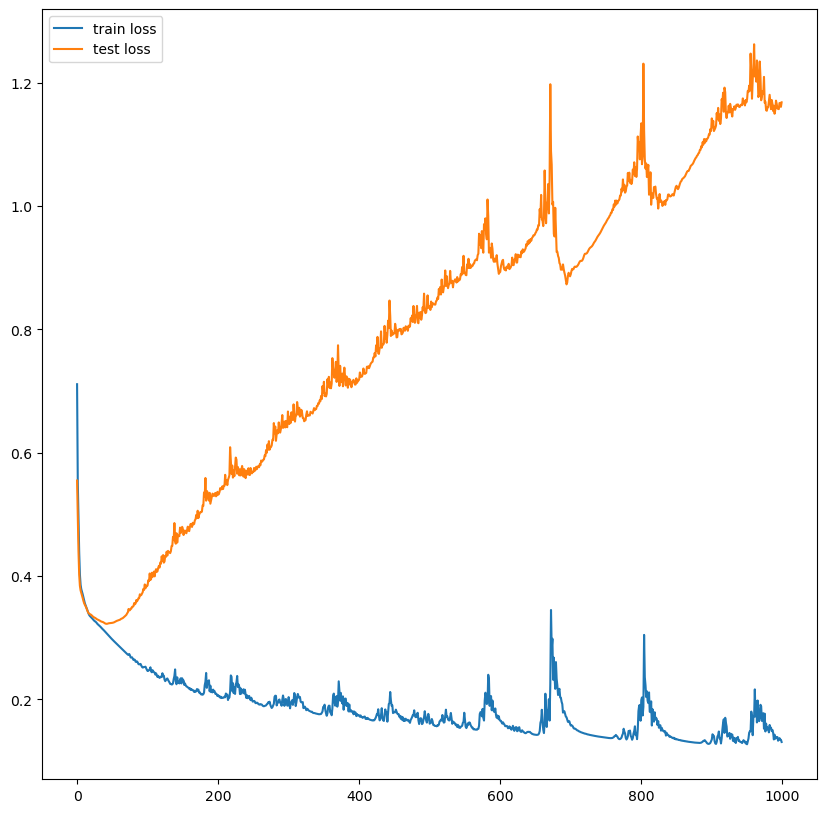

In [40]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [41]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [42]:
# Check how the predicted outputs look like and after taking argmax compare with y_train or y_test 
#predictions_train  
#y_train,y_test

In [43]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [44]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [45]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 93.726
Test Accuracy: 81.669
